# Customer Sentiment Analysis

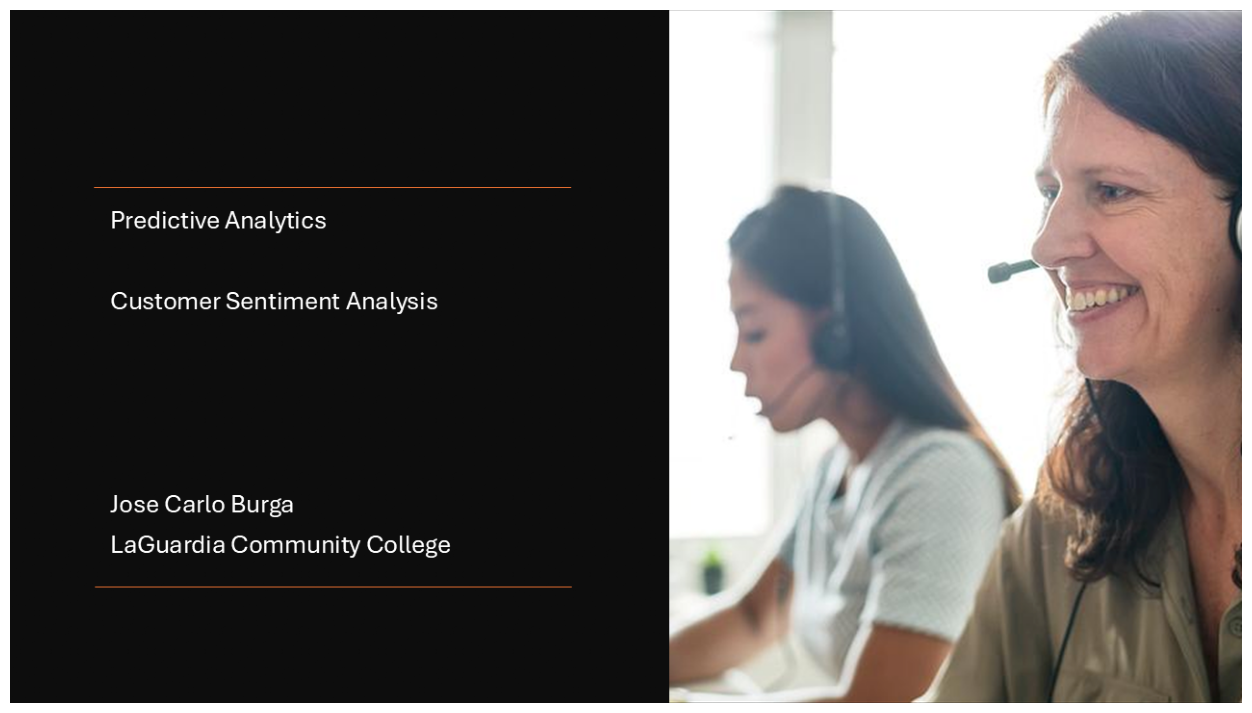

In [1184]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the image path
image_path = r"C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\Customer Satisfaction Pic.png"

# Load the image
img = mpimg.imread(image_path)

# Display the image with adjusted figure size
plt.figure(figsize=(16, 9))  # Adjust figsize as needed (width, height in inches)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Importing the necessary packages

In [1185]:
import pandas as pd
from datetime import datetime, timedelta
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Loading the dataset

In [1186]:
file_path = r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\customer_support_tickets.csv'

data = pd.read_csv(file_path)

# Initial Exploration

    # Summary of the dataset

In [1187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

    # Column Names

In [1188]:
data.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

# Handling Missing Values

    # Missing value analysis

In [1189]:
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().mean() * 100).sort_values(ascending=False)

    # Combining  into a dataFrame for visualization

In [1190]:
missing_analysis = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

    # Heatmap visualization of missing values

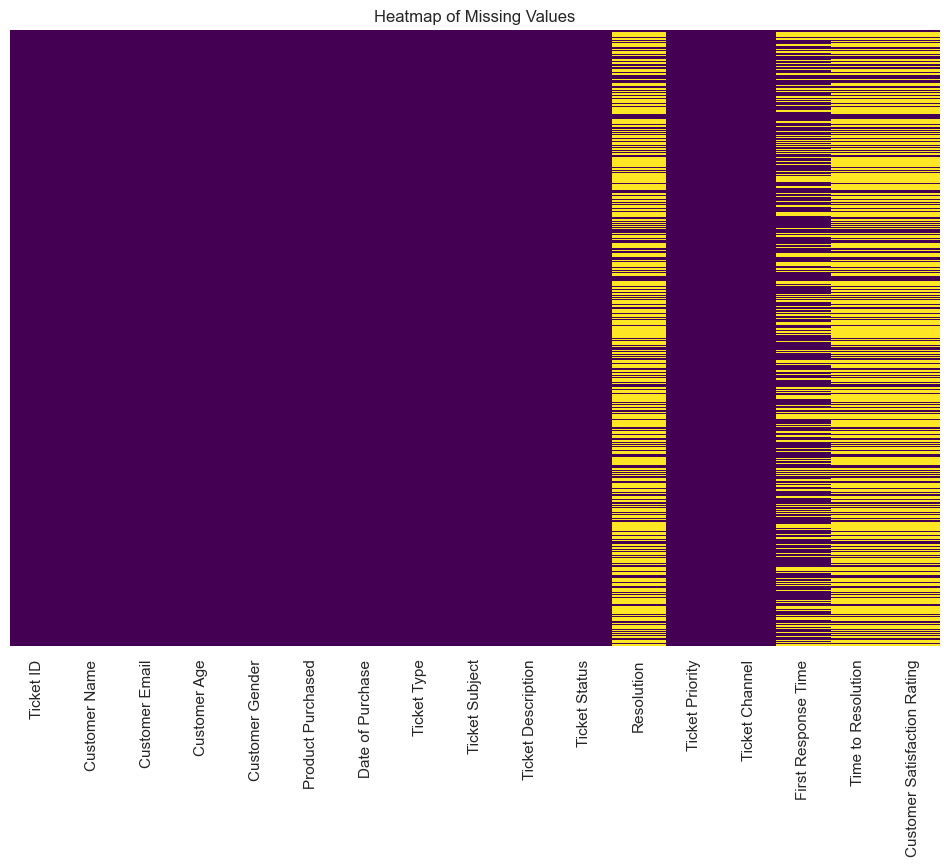

In [1191]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

    # Bar visualization of missing values

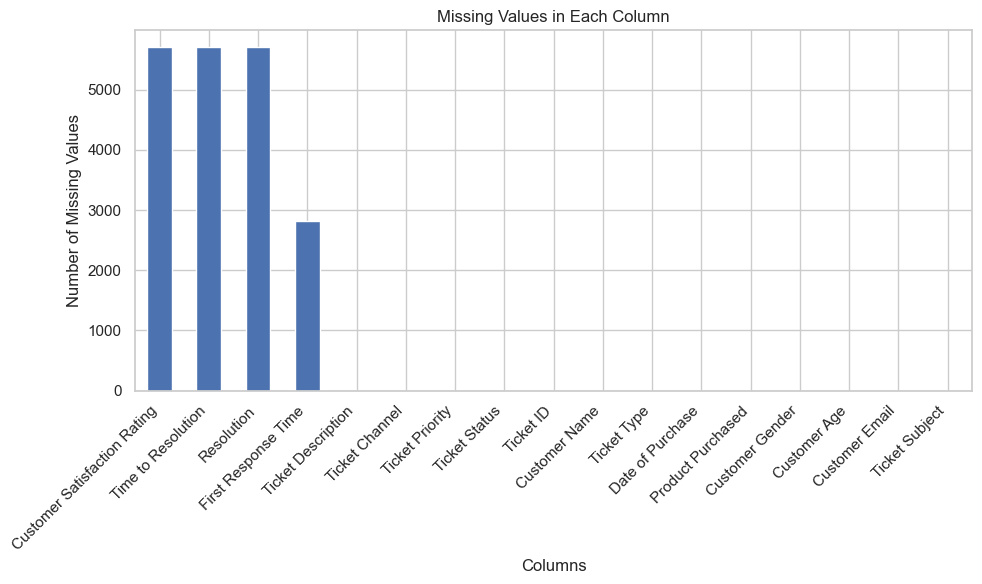

In [1192]:
missing_values = data.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


    # Imputing Missing Values

In [1193]:
# For numerical columns, using the median
numerical_columns = data.select_dtypes(include=['number']).columns
for col in numerical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# For categorical columns, using the mode
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\jcbur\AppData\Local\Temp\ipykernel_4248\2100482321.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\jcbur\AppData\Local\Temp\ipykernel_4248\2100482321.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

    # Verifying that there are no missing values remaining

In [1194]:
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64


    # Verifying that missing values have been imputed

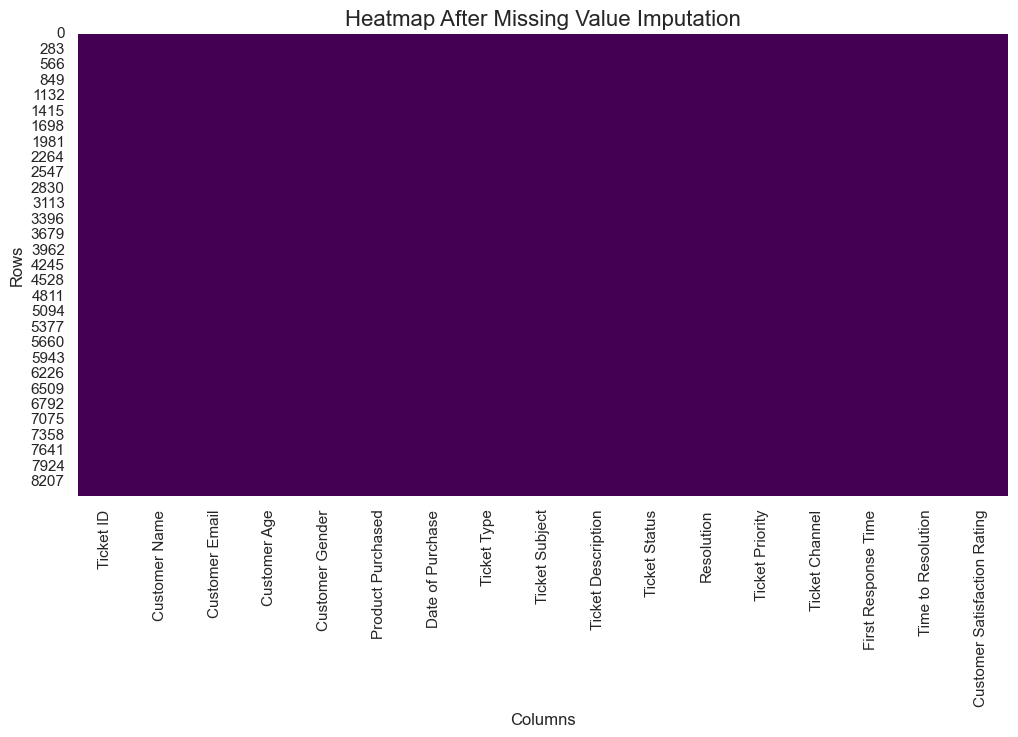

In [1195]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap After Missing Value Imputation", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.show()

# Challenge: Predicting Customer Satisfaction Rating

    # Actionability:

        Helps identify factors driving customer satisfaction.
        Enables proactive actions to improve service quality.

# Initial transformations

    # Visualizing the column names

In [1196]:
data.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

    # Data Engineering:

        I have droppep the 'First Response Time' feature to focus the analysis in the total ticket life lapse.
        I have calculated the lapse between the 'Date of Purchase' and 'Time to Resolution', as a new feature.
        I have dropped both the 'Date of Purchase' and the 'Time to Resolution' original features to reduce collaterality

In [1197]:
# Ensure 'Date of Purchase' and 'Time to Resolution' are in datetime format
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')

# Calculate the duration (in days) between 'Date of Purchase' and 'Time to Resolution'
data['Duration (days)'] = (data['Time to Resolution'] - data['Date of Purchase']).dt.days

data.drop(['Date of Purchase', 'Time to Resolution', 'First Response Time'], axis=1, inplace=True, errors='ignore')

In [1198]:
data.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject',
       'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority',
       'Ticket Channel', 'Customer Satisfaction Rating', 'Duration (days)'],
      dtype='object')

    # Encoding categorical values into the same column 

In [1199]:
data['Product Purchased'] = data['Product Purchased'].astype('category').cat.codes
data['Ticket Priority'] = data['Ticket Priority'].astype('category').cat.codes
data['Ticket Channel'] = data['Ticket Channel'].astype('category').cat.codes
data['Customer Gender'] = data['Customer Gender'].astype('category').cat.codes
data['Ticket Type'] = data['Ticket Type'].astype('category').cat.codes
data['Ticket Status'] = data['Ticket Status'].astype('category').cat.codes

    # Dropping unnecessary features

In [1200]:
data.drop(['Customer Name', 'Customer Email', 'Ticket Subject', 'Ticket Description', 'Resolution'], axis=1, inplace=True, errors='ignore')

    # Displaying the final result after initial transformations

In [1201]:
data.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Status,Ticket Priority,Ticket Channel,Customer Satisfaction Rating,Duration (days)
0,1,32,2,16,4,2,0,3,3.0,801
1,2,42,0,21,4,2,0,0,3.0,740
2,3,48,2,10,4,0,2,3,3.0,1052
3,4,27,0,25,0,0,2,3,3.0,930
4,5,67,0,5,0,0,2,1,1.0,1213


# Feature Selection

    

    # Correlation Analysis

    # Calculating correlation of all columns with 'Customer Satisfaction Rating'

In [1202]:

correlation_with_satisfaction = data.corr()['Customer Satisfaction Rating'].sort_values(ascending=False)

    # Creating a bar plot for correlations

C:\Users\jcbur\AppData\Local\Temp\ipykernel_4248\2863633399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


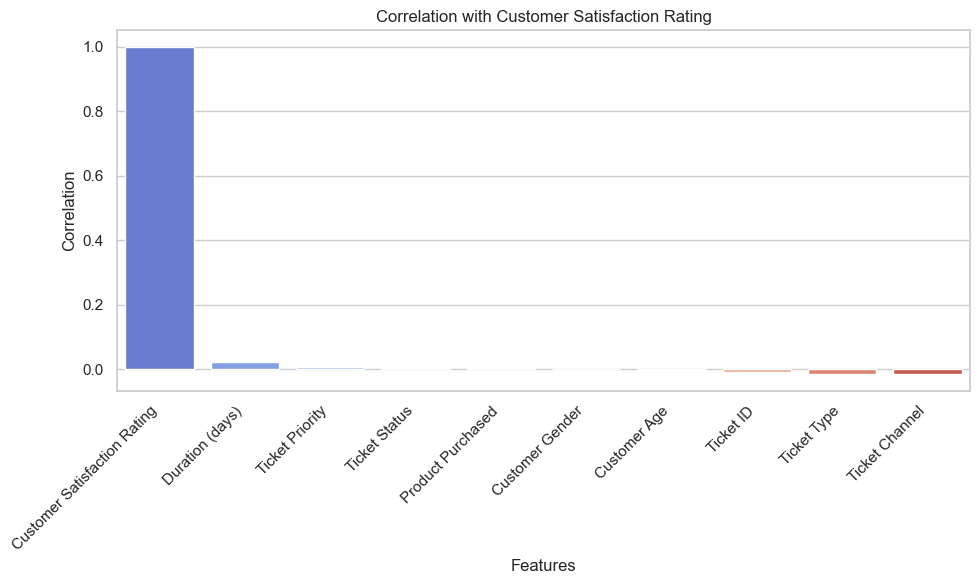

In [1203]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_satisfaction.index,
    y=correlation_with_satisfaction.values,
    palette="coolwarm"
)
plt.xticks(rotation=45, ha="right")
plt.title("Correlation with Customer Satisfaction Rating")
plt.ylabel("Correlation")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

    # Creating a heatmap for the full correlation matrix, highlighting Customer Satisfaction Rating

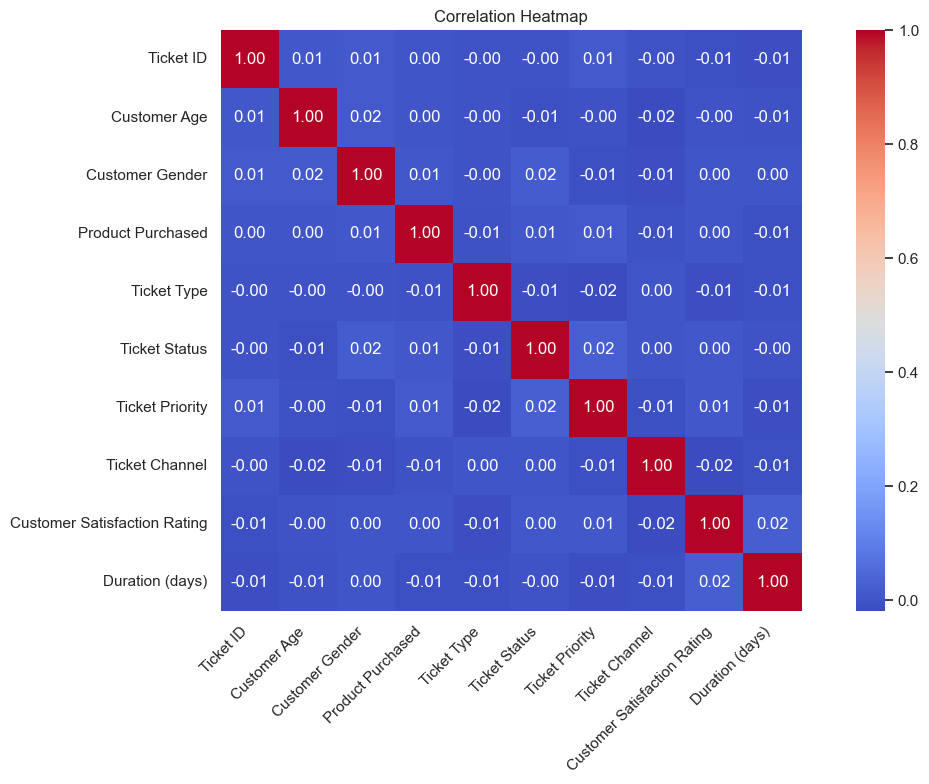

In [1204]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    data.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    mask=None
)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

    # Display correlations

In [1205]:

print("Correlation with Customer Satisfaction Rating:\n", correlation_with_satisfaction)


Correlation with Customer Satisfaction Rating:
 Customer Satisfaction Rating    1.000000
Duration (days)                 0.022034
Ticket Priority                 0.005761
Ticket Status                   0.004371
Product Purchased               0.003403
Customer Gender                 0.000983
Customer Age                   -0.002172
Ticket ID                      -0.008135
Ticket Type                    -0.013608
Ticket Channel                 -0.015660
Name: Customer Satisfaction Rating, dtype: float64


# Feature importance with Random Forest

In [1206]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare features and target
X = data.drop(columns=['Ticket ID', 'Customer Satisfaction Rating'])
y = data['Customer Satisfaction Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


             Feature  Importance
7    Duration (days)    0.289376
0       Customer Age    0.217406
2  Product Purchased    0.197424
3        Ticket Type    0.079820
5    Ticket Priority    0.070049
6     Ticket Channel    0.068348
1    Customer Gender    0.054178
4      Ticket Status    0.023399


#   Dropping less important features 

In [1207]:
data.drop(['Ticket Status'], axis=1, inplace=True, errors='ignore')

# Final Dataframe

In [1208]:
data.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Priority,Ticket Channel,Customer Satisfaction Rating,Duration (days)
0,1,32,2,16,4,0,3,3.0,801
1,2,42,0,21,4,0,0,3.0,740
2,3,48,2,10,4,2,3,3.0,1052
3,4,27,0,25,0,2,3,3.0,930
4,5,67,0,5,0,2,1,1.0,1213


EDA

    Exploring and Visualizing Feature Relationships

In [1209]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Convert 'Time to Resolution' to numeric (hours)
X_cleaned['Time to Resolution'] = (
    pd.to_datetime(X_cleaned['Time to Resolution']) - pd.to_datetime(cleaned_data['First Response Time'])
).dt.total_seconds() / 3600

# Define numerical and categorical features
numerical_features = ['Customer Age', 'Time to Resolution']
categorical_features = ['Product Purchased', 'Ticket Priority', 'Ticket Type', 'Ticket Channel']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# Fit and transform the data
X_processed = preprocessor.fit_transform(X_cleaned)

# Convert the processed data back into a DataFrame for display
encoded_categories = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
processed_columns = numerical_features + list(encoded_categories)
X_processed_df = pd.DataFrame(X_processed, columns=processed_columns)

# Display the processed DataFrame
import ace_tools as tools; tools.display_dataframe_to_user(
    name="Preprocessed Features for Model Training",
 


SyntaxError: incomplete input (777074578.py, line 33)

C:\Users\jcbur\AppData\Local\Temp\ipykernel_4248\1471070919.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = data.groupby('Age Group')['Customer Satisfaction Rating'].mean().reset_index()
C:\Users\jcbur\AppData\Local\Temp\ipykernel_4248\1471070919.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Customer Satisfaction Rating', data=age_group_avg, palette='coolwarm')


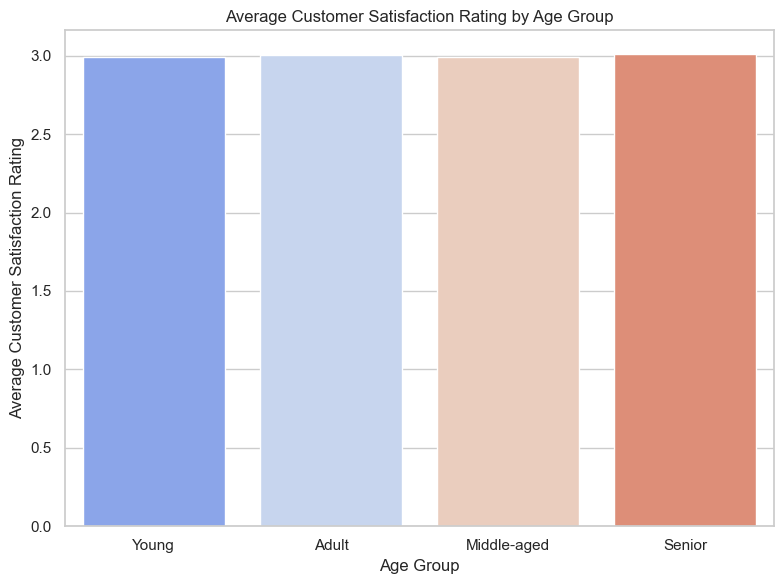

C:\Users\jcbur\AppData\Local\Temp\ipykernel_4248\1471070919.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Purchased', y='Customer Satisfaction Rating', data=product_avg, palette='muted')


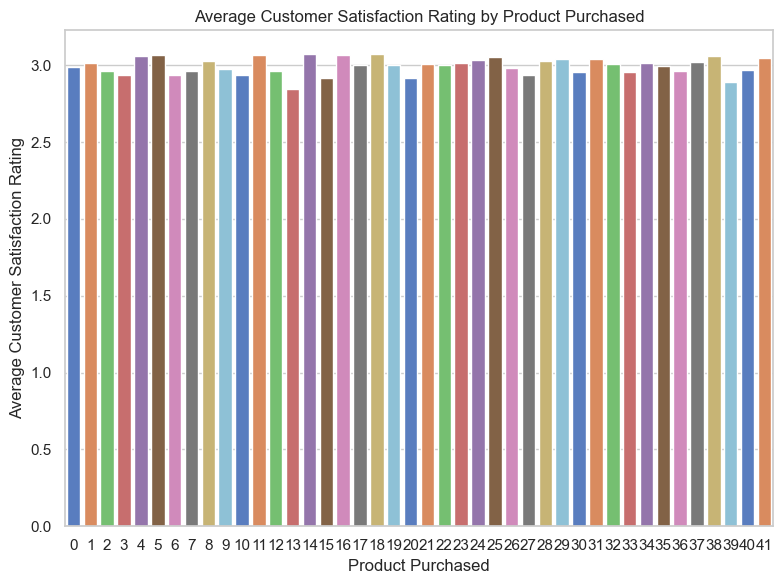

C:\Users\jcbur\AppData\Local\Temp\ipykernel_4248\1471070919.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_avg = data.groupby('Duration Group')['Customer Satisfaction Rating'].mean().reset_index()
C:\Users\jcbur\AppData\Local\Temp\ipykernel_4248\1471070919.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Duration Group', y='Customer Satisfaction Rating', data=duration_avg, palette='viridis')


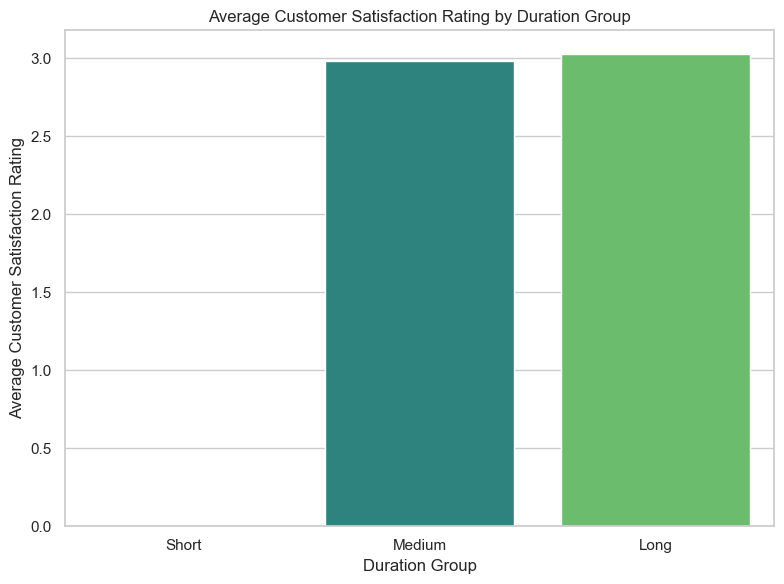

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set consistent style
sns.set_theme(style="whitegrid")

# 1. Bar Plot: Average Satisfaction by Customer Age Group
data['Age Group'] = pd.cut(data['Customer Age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
age_group_avg = data.groupby('Age Group')['Customer Satisfaction Rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Age Group', y='Customer Satisfaction Rating', data=age_group_avg, palette='coolwarm')
plt.title('Average Customer Satisfaction Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Customer Satisfaction Rating')
plt.tight_layout()
plt.show()

# 2. Bar Plot: Average Satisfaction by Product Purchased
product_avg = data.groupby('Product Purchased')['Customer Satisfaction Rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Product Purchased', y='Customer Satisfaction Rating', data=product_avg, palette='muted')
plt.title('Average Customer Satisfaction Rating by Product Purchased')
plt.xlabel('Product Purchased')
plt.ylabel('Average Customer Satisfaction Rating')
plt.tight_layout()
plt.show()

# 3. Bar Plot: Average Satisfaction by Duration Bins
data['Duration Group'] = pd.cut(data['Duration (days)'], bins=[0, 500, 1000, 1500], labels=['Short', 'Medium', 'Long'])
duration_avg = data.groupby('Duration Group')['Customer Satisfaction Rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Duration Group', y='Customer Satisfaction Rating', data=duration_avg, palette='viridis')
plt.title('Average Customer Satisfaction Rating by Duration Group')
plt.xlabel('Duration Group')
plt.ylabel('Average Customer Satisfaction Rating')
plt.tight_layout()
plt.show()


# Model Accuracy Testing